In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
img = cv2.imread('./test images/modi.jpg')
img.shape

(380, 570, 3)

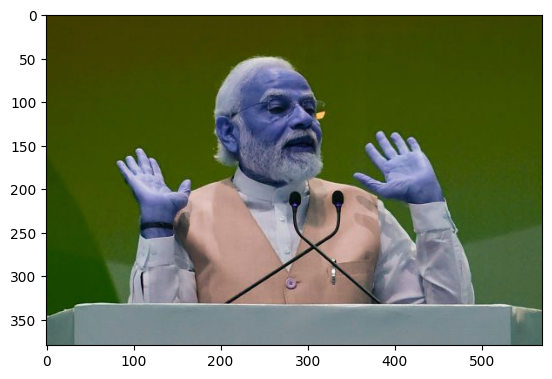

In [36]:
plt.imshow(img)

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(400, 636)

In [29]:
gray

array([[216, 218, 221, ..., 254, 254, 255],
       [216, 218, 221, ..., 254, 254, 255],
       [216, 219, 221, ..., 254, 254, 255],
       ...,
       [120, 115, 110, ..., 169, 151, 140],
       [117, 116, 113, ..., 170, 151, 140],
       [126, 127, 127, ..., 174, 154, 142]], dtype=uint8)

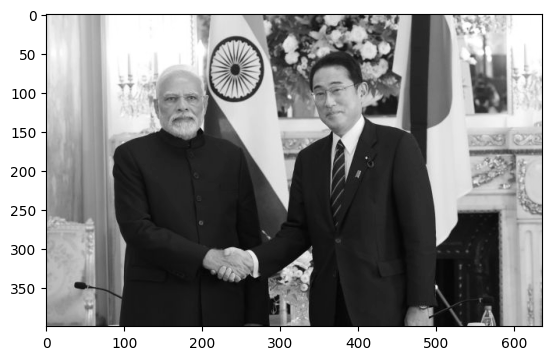

In [30]:
plt.imshow(gray, cmap='gray')

In [31]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[325,  69,  74,  74],
       [141,  81,  68,  68]], dtype=int32)

In [32]:
(x,y,w,h) = faces[0]
x,y,w,h

(325, 69, 74, 74)

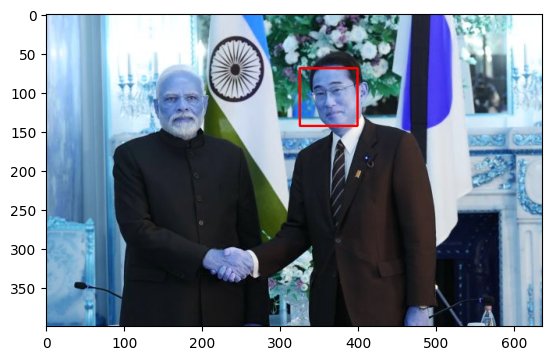

In [33]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

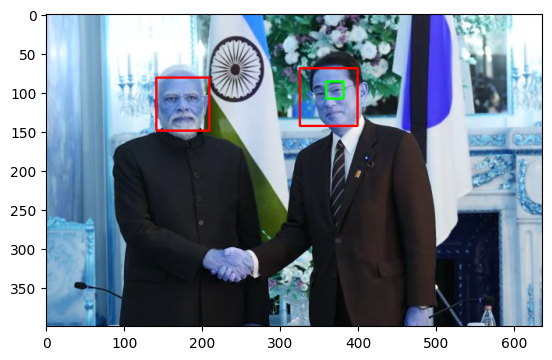

In [34]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()